# Classifier Comparison


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # for making palettes
from sklearn import tree
from sklearn import datasets  # for generating toy data
from sklearn import naive_bayes
from sklearn import neighbors

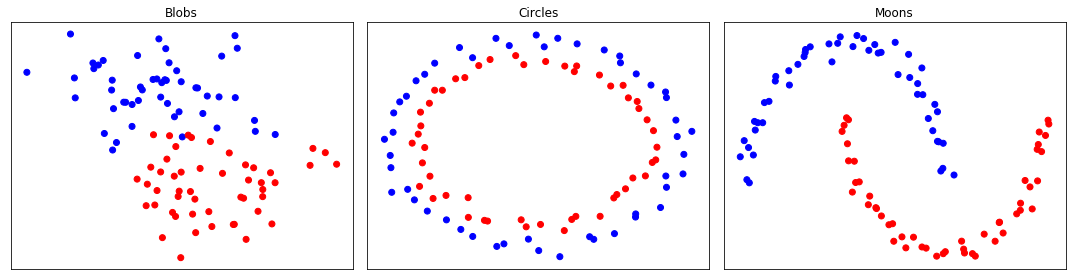

In [54]:
X_blob, y_blob = datasets.make_blobs(random_state=0,centers=2)    
X_circ, y_circ = datasets.make_circles(noise=0.04, random_state=0)
X_moon, y_moon = datasets.make_moons(noise=0.05, random_state=0)

XSETS = [X_blob, X_circ, X_moon]
YSETS = [y_blob, y_circ, y_moon]
SET_NAMES = ['Blobs','Circles','Moons']
NUM_SETS = len(XSETS)

plt.figure(figsize=(15,4))
for i in range(NUM_SETS):
    X = XSETS[i]
    y = YSETS[i]
    plt.subplot(1,NUM_SETS,i+1)

    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
    plt.xticks([])
    plt.yticks([])
    plt.title(SET_NAMES[i])
plt.tight_layout()
plt.show()

In [36]:
def plot_decision(clf, X, cmap='coolwarm', h=0.1, margin=0.5):
    """Plots decision boundary of clf.  X is only used to find min/max range; h = grid size; margin = extra border padding"""
    x_min, x_max = X[:, 0].min()-margin, X[:, 0].max()+margin
    y_min, y_max = X[:, 1].min()-margin, X[:, 1].max()+margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap)

In [41]:
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000',  '#0000FF'])

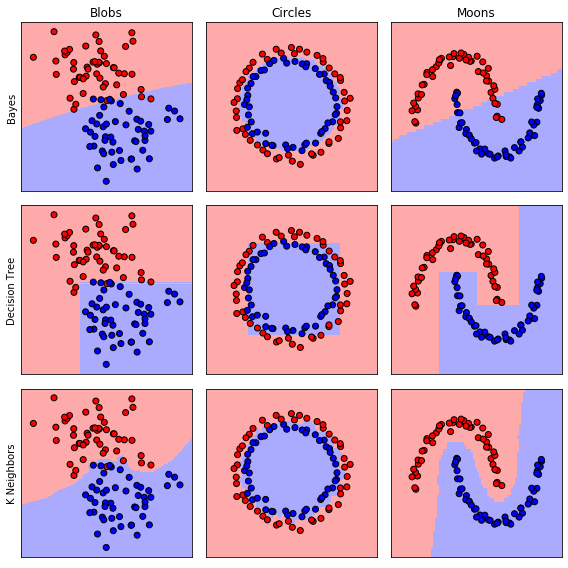

In [67]:
gnb = naive_bayes.GaussianNB()
dtree = tree.DecisionTreeClassifier(max_depth=5)
knn = neighbors.KNeighborsClassifier()
CLFS = [gnb, dtree, knn]
CLF_NAMES = ['Bayes', 'Decision Tree','K Neighbors']
NUM_CLFS = len(CLFS)

plt.figure(figsize=(8,8))
for i in range(NUM_SETS):
    X = XSETS[i]
    y = YSETS[i]
    for j in range(NUM_CLFS):
        plt.subplot(NUM_CLFS,NUM_SETS,i+j*NUM_SETS+1)   
        clf = CLFS[j]
        clf.fit(X,y)
        plot_decision(clf,X,h=0.05,cmap=cmap_light)  
        plt.scatter(X[:,0], X[:,1], c=y, ec='k',cmap=cmap_bold)
        plt.xticks([])
        plt.yticks([])
        if j==0: plt.title(SET_NAMES[i])
        if i==0: plt.ylabel(CLF_NAMES[j])
plt.tight_layout()
plt.show()